In [1]:
!pip install pydotplus
!apt-get install graphviz -y
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [14]:
# prompt: load titanic dataset

import pandas as pd
import seaborn as sns

# Load the titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

# Print the first few rows of the dataset
titanic


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [15]:
# Replace unknown ages with a flag value of -1
titanic.age.fillna(-1, inplace=True)

# For the purpose of this example let's get rid of these features:
titanic.drop(['survived', 'sex', 'who', 'embarked', 'embark_town', 'adult_male', 'class', 'deck'], axis=1, inplace=True)

# Map these string features to numerical values
# titanic.sex = titanic.sex.map({'female':0, 'male':1})
# titanic['class'] = titanic['class'].map({'First':1, 'Second':2, 'Third':3})

titanic

AttributeError: 'DataFrame' object has no attribute 'sex'

In [16]:
X = titanic.drop('alive', axis=1)

# titanic.alive.map({'yes':1, 'no':0})
y = titanic.alive

In [161]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

while True:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9885)
    if (y_train=='yes').sum() == 3: break

In [162]:
tree = DecisionTreeClassifier(max_depth=1, ccp_alpha=0.01)
tree.fit(X_train, y_train)
tree.score(X_test, y_test)

0.6152099886492622

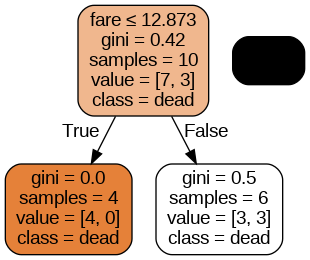

In [163]:
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, class_names=['dead', 'alive'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


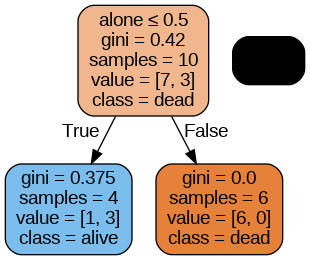

In [121]:
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, class_names=['dead', 'alive'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


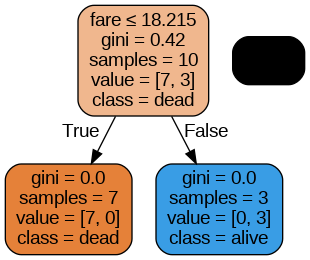

In [160]:
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, class_names=['dead', 'alive'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


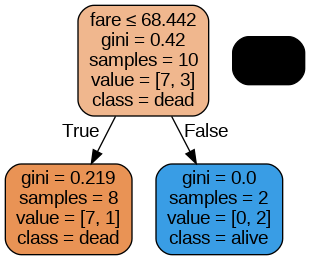

In [157]:
dot_data = export_graphviz(tree, out_file=None, feature_names=X.columns, class_names=['dead', 'alive'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())


In [20]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(max_depth=1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.6771300448430493

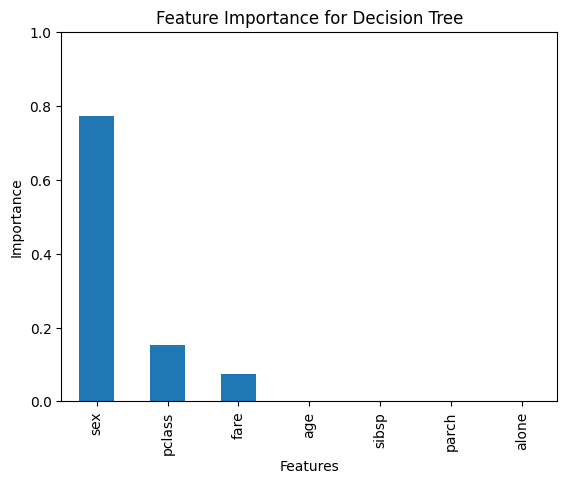

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Extract feature importances
dt_feature_importances = tree.feature_importances_

# Create a pandas series to make plotting easier, assuming `X_train` is a DataFrame
dt_importances = pd.Series(dt_feature_importances, index=X_train.columns)

# Plot
dt_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance for Decision Tree')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.ylim(0,1)
plt.show()


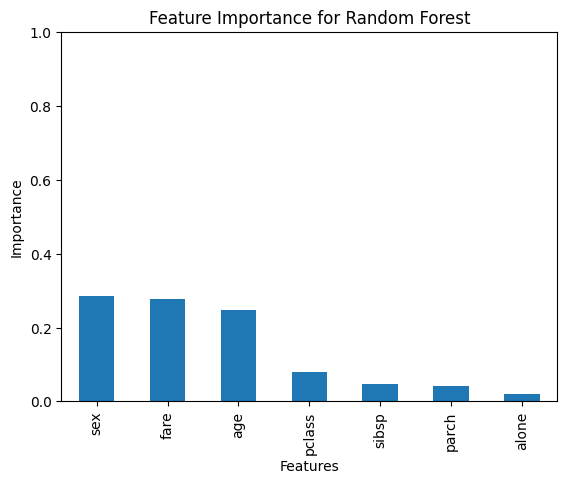

In [ ]:
# Extract feature importances
rf_feature_importances = rf.feature_importances_

# Create a pandas series
rf_importances = pd.Series(rf_feature_importances, index=X_train.columns)

# Plot
rf_importances.sort_values(ascending=False).plot(kind='bar')
plt.title('Feature Importance for Random Forest')
plt.ylabel('Importance')
plt.xlabel('Features')
plt.ylim(0,1)
plt.show()


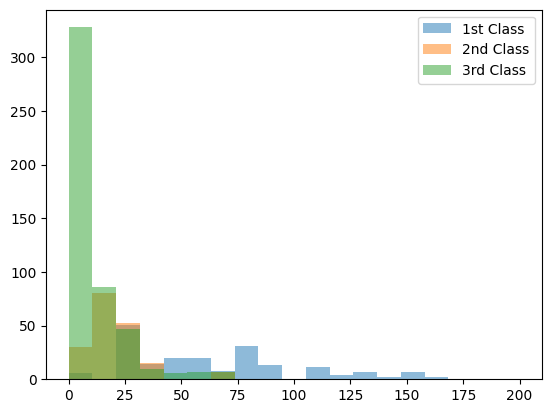

In [ ]:
import numpy as np
bins = np.linspace(0,200,20)
plt.hist(X.fare[X.pclass==1], bins, alpha=.5, label='1st Class')
plt.hist(X.fare[X.pclass==2], bins, alpha=.5, label='2nd Class')
plt.hist(X.fare[X.pclass==3], bins, alpha=.5, label='3rd Class')
plt.legend()

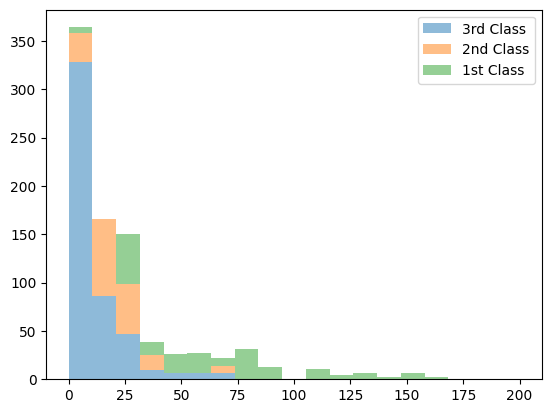

In [ ]:
bins = np.linspace(0,200,20)
plt.hist([X.fare[X.pclass==3], X.fare[X.pclass==2], X.fare[X.pclass==1]], bins,
         alpha=.5, label=['3rd Class', '2nd Class', '1st Class'], stacked=True)
plt.legend()


TypeError: Must provide 'func' or tuples of '(column, aggfunc).

# Random Forest on the Moons Dataset

In [ ]:
def plot_decision_boundaries(model, X, y):

    x_grid, y_grid = np.meshgrid(np.linspace(-2, 3, 200),
                                 np.linspace(-1, 2, 200))
    Z = model.predict(np.c_[x_grid.ravel(), y_grid.ravel()])
    Z = Z.reshape(x_grid.shape)
    plt.contourf(x_grid, y_grid, Z, alpha=0.5, cmap='bwr')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='w', cmap='bwr')
    plt.title("Random Forest Decision Boundary")

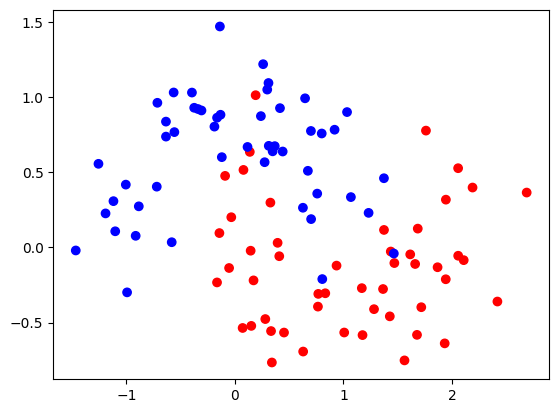

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree

X, y = make_moons(n_samples=100, noise=0.25, random_state=42)

plt.scatter(*X.T, c=y, cmap='bwr')
plt.show()

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=4, oob_score=True)
rf.fit(X, y)

RandomForestClassifier(max_depth=4, oob_score=True, random_state=42)

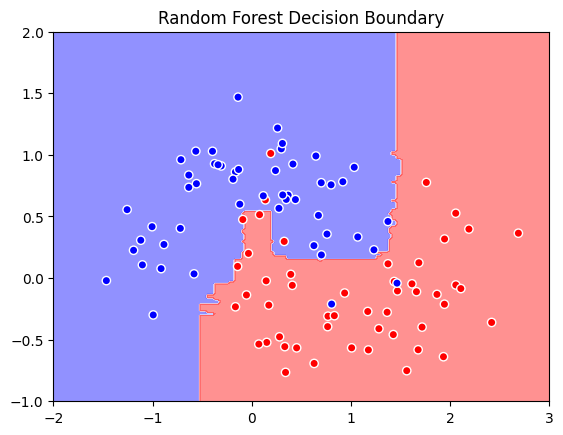

In [ ]:
plot_decision_boundaries(rf, X, y)
plt.show()

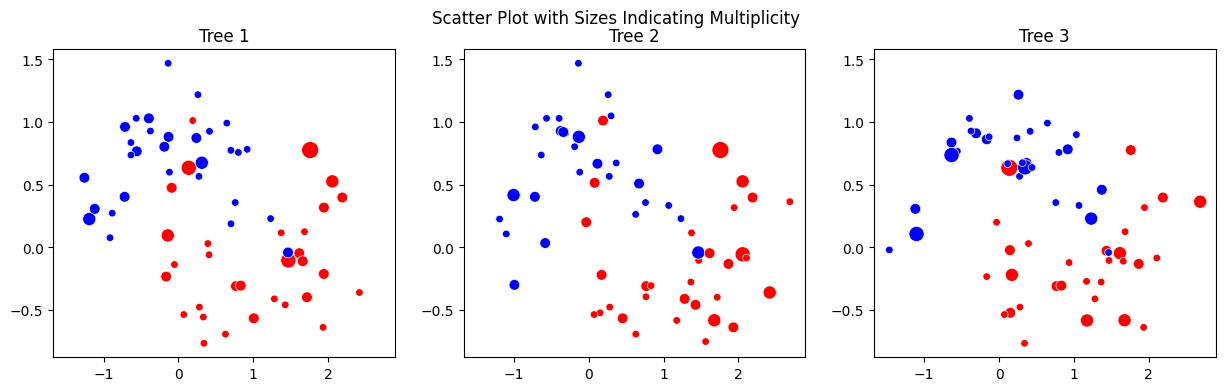

In [ ]:
# Accessing sample indices for the first tree
plt.figure(figsize=(15, 4))
np.random.seed(42) # Ensure reproducibility

for i in range(3):
    plt.subplot(1,3,i+1)
    bootstrapped_indices = np.random.choice(len(X), size=len(X), replace=True)

    # Calculate the multiplicity of each sample in the bootstrapped dataset
    unique, counts = np.unique(bootstrapped_indices, return_counts=True)
    multiplicity = dict(zip(unique, counts))

    # Prepare the sizes for the scatter plot
    sizes = [multiplicity.get(i, 0) * 30 for i in range(len(X))]  # Multiply by a factor to make size differences more visible

    # Now, let's plot the original dataset with sizes reflecting the bootstrapped multiplicity
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr',
                s=sizes, alpha=1, edgecolor='w', linewidth=0.5)
    plt.title(f'Tree {i+1}')

plt.suptitle('Scatter Plot with Sizes Indicating Multiplicity')
plt.show()


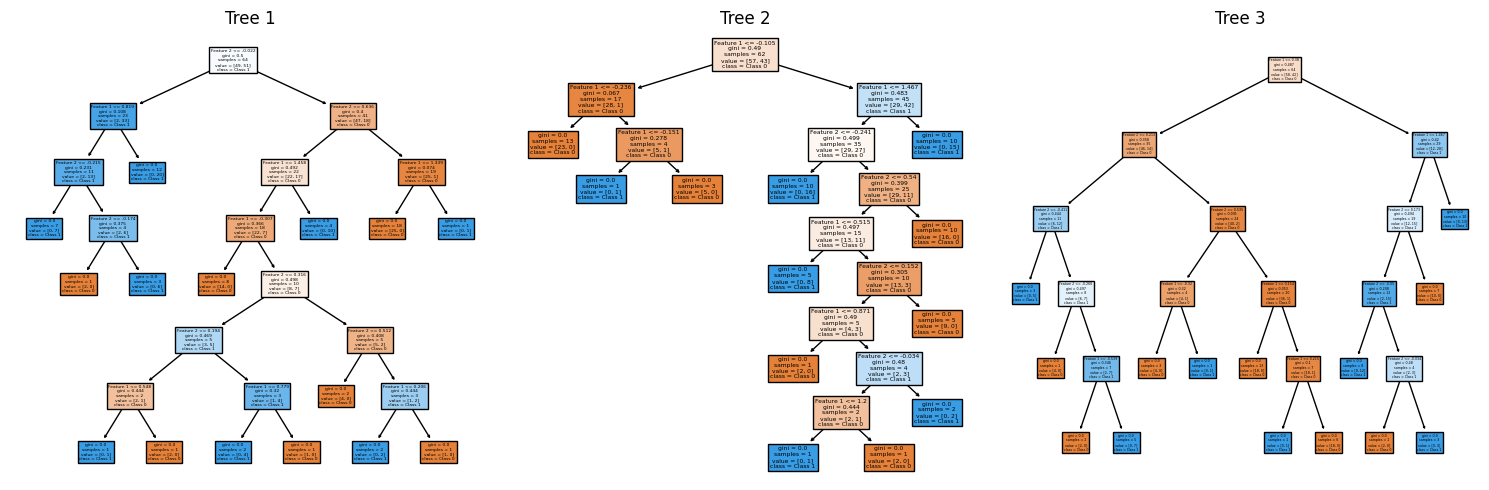

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), dpi=100)
for index in range(3):
    plot_tree(rf.estimators_[index], filled=True, ax=axes[index],
              feature_names=['Feature 1', 'Feature 2'],
              class_names=['Class 0', 'Class 1'])
    axes[index].set_title(f'Tree {index + 1}')
plt.tight_layout()
plt.show()


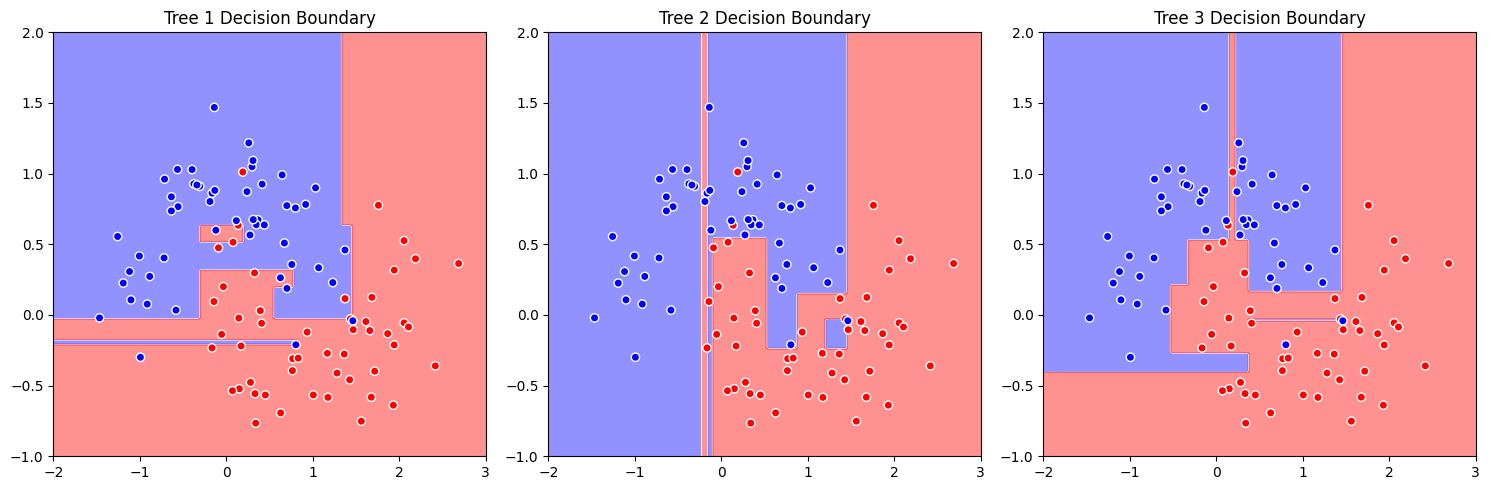

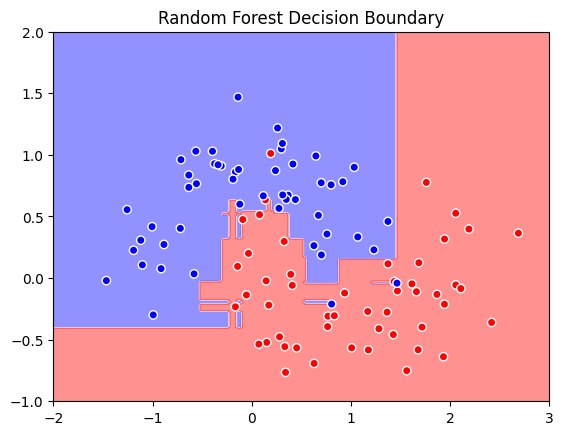

In [ ]:
plt.figure(figsize=(15, 5))

for index in range(3):
    plt.subplot(1,3,index+1)
    plot_decision_boundaries(rf.estimators_[index], X, y)
    plt.title(f'Tree {index+1} Decision Boundary')

plt.tight_layout()
plt.show()

plot_decision_boundaries(rf, X, y)
plt.show()

In [ ]:
# prompt: calculate the feature importance and display it in a bar chart

import pandas as pd
import matplotlib.pyplot as plt
feature_importances = pd.Series(rf.estimators_[0].feature_importances_)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'columns'

.

.

.

.




















.

# Working with 8x8 Digits

In [ ]:
# prompt: 8x8 digits classification with random forest and BDTs

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

# Load the digits dataset
digits = load_digits()

- Check the keys() of the digits object to understand the data with which you're working.

- Plot one of each digit
    - Use subplots

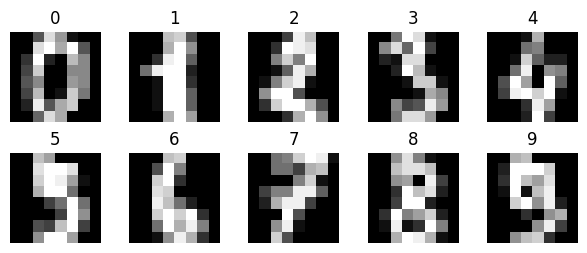

In [ ]:
fig, axes = plt.subplots(2, 5)
fig.tight_layout(w_pad=-1, h_pad=-15)

for i, (im, target) in enumerate(zip(digits.images[:10], digits.target[:10])):
    ax = axes[i//5, i%5]
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(target)

In [ ]:
digits.data[0].shape

(64,)

In [ ]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

# Train a random forest classifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate the classifiers on the test set
print("Random Forest accuracy:", rf.score(X_test, y_test))

Random Forest accuracy: 0.9822222222222222


checking n=1
checking n=3
checking n=10
checking n=30
checking n=100
checking n=300
checking n=1000


(0.0, 1.0)

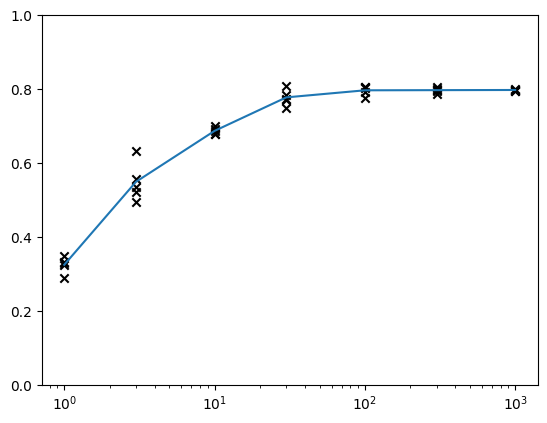

In [ ]:
n_samples = 5
n_estimators_list = [1,3,10,30,100,300,1000]
scores = np.empty((len(n_estimators_list), n_samples))

for i, n_estimators in enumerate(n_estimators_list):
    print(f'checking n={n_estimators}')

    for j in range(n_samples):
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=2)
        rf.fit(X_train, y_train)
        score = rf.score(X_test, y_test)
        plt.scatter(n_estimators, score, marker='x', color='k')

        scores[i,j] = score

plt.plot(n_estimators_list, scores.mean(axis=1))
plt.xscale('log')
plt.ylim(0,1)

In [ ]:
n_samples = 5
max_depth_list = list(range(1,9))
scores = np.empty((len(max_depth_list), n_samples))

for i, max_depth in enumerate(max_depth_list):
    print(f'checking depth={max_depth}')

    for j in range(n_samples):
        rf = RandomForestClassifier(n_estimators=100, max_depth=max_depth)
        rf.fit(X_train, y_train)
        score = rf.score(X_test, y_test)
        plt.scatter(max_depth, score, marker='x', color='k')

        scores[i,j] = score

plt.plot(max_depth_list, scores.mean(axis=1))
plt.ylim(0,1)

NameError: name 'np' is not defined

In [ ]:
rf.score(X_test, y_test)

0.8133333333333334

Prove that you understand the score function by implementing recaclulating the score using only numpy

In [ ]:
np.mean(rf.predict(X_test) == y_test)

0.8133333333333334

In [ ]:
# Train a bagging classifier with decision trees
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, random_state=0)
bag.fit(X_train, y_train)

print("Bagging accuracy:", bag.score(X_test, y_test))

In [ ]:
# prompt: implement boosted decision tree

from sklearn.ensemble import GradientBoostingClassifier

# Train a boosted decision tree classifier
boost = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, random_state=0)
boost.fit(X_train, y_train)

# Evaluate the classifier on the test set
print("Boosted decision tree accuracy:", boost.score(X_test, y_test))


Boosted decision tree accuracy: 0.9555555555555556


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

tree = DecisionTreeClassifier()
ada = AdaBoostClassifier(tree, n_estimators=1000, learning_rate=0.01, random_state=0)
ada.fit(X_train, y_train)

print("AdaBoost accuracy:", ada.score(X_test, y_test))


AdaBoost accuracy: 0.8488888888888889


In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators=10000, learning_rate=0.01, random_state=0)
xgb.fit(X_train, y_train)

print("XGBoost accuracy:", xgb.score(X_test, y_test))


XGBoost accuracy: 0.9577777777777777


In [ ]:
from tqdm import tqdm

In [ ]:
def scan(scan_param, scan_values, other_params, n_samples=3):

    scores = np.empty((len(scan_values), n_samples))

    for i in tqdm(range(len(scan_values))):
        value = scan_values[i]
        for j in range(n_samples):

            xgb = XGBClassifier(**{scan_param: value},
                                **other_params)
            xgb.fit(X_train, y_train)
            scores[i,j] = xgb.score(X_test, y_test)

    return scores

In [ ]:
scan_param = 'learning_rate'
scan_values = [0.003, 0.01,.03,.1,.3,1,3,10]
params = {'n_estimators' : 100,
          'max_depth' : 10}

scores = scan(scan_param, scan_values, params, n_samples=2)

100%|██████████| 8/8 [00:12<00:00,  1.53s/it]


(0.0, 1.0)

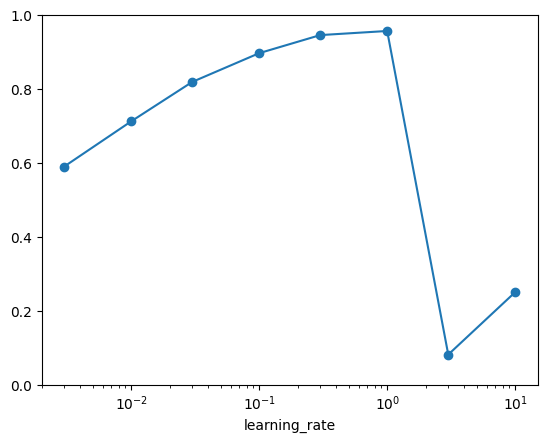

In [ ]:
plt.plot(scan_values, scores.mean(1), '-o')
plt.xlabel(scan_param)
plt.xscale('log')
plt.ylim(0,1)